/tmp/ipykernel_2496547/2238728696.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Method", y="Perplexity", data=df, palette="Set2")
/tmp/ipykernel_2496547/2238728696.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


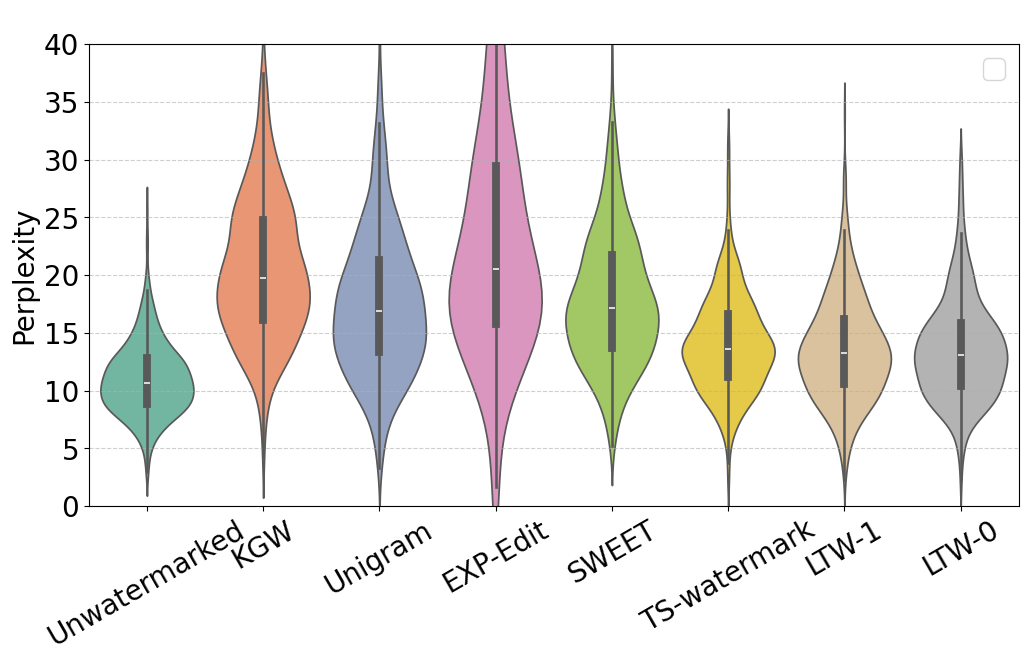

In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size': 20,              # 默认字体大小
    'axes.titlesize': 24,         # 标题字体大小
    'axes.labelsize': 20,         # 轴标签字体大小
    'xtick.labelsize': 20,        # x轴刻度标签字体大小
    'ytick.labelsize': 20,        # y轴刻度标签字体大小
    'legend.fontsize': 20         # 图例字体大小
})
# 假设 watermarks 是一个字典，包含方法名称和 JSON 文件路径
watermarks = {
    "Unwatermarked": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl.json",
    "KGW": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl.json",
    "Unigram": "/data3/wcr/others work/Unigram-Watermark-main/ppl.json",
    "EXP-Edit": "/data3/wcr/others work/watermark-main/ppl.json",
    "SWEET": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl.json",
    "TS-watermark": "/data3/wcr/others work/TS_watermark-main/ppl.json",
    "Ours_KGW1": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl.json",
    "Ours_KGW0": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl.json",
}

keys = {
    "Unwatermarked": "nowm_ppl",
    "KGW": "kgw_ppl",
    "Unigram": "ppl_list",
    "EXP-Edit": "ppl_list",
    "SWEET": "sweet_ppl",
    "TS-watermark": "ppl_list",
    "Ours_KGW1": "ourwm_1_ppl",
    "Ours_KGW0": "ourwm_ppl",
}

# 读取数据
data = []
for method, path in watermarks.items():
    with open(path, "r") as f:
        json_data = json.load(f)
        ppl_list = json_data[keys[method]]  # 获取对应的key值的列表
        
        # 确保 ppl_list 是列表，否则可能是标量
        if not isinstance(ppl_list, list):
            ppl_list = [ppl_list]

        if method=='Ours_KGW1':
            method="LTW-1"
        elif method=="Ours_KGW0":
            method="LTW-0"

        # 展开列表，每个值对应一行
        for ppl in ppl_list:
            data.append({"Method": method, "Perplexity": ppl})

# 转换为 DataFrame
df = pd.DataFrame(data)

# 绘制小提琴图
plt.figure(figsize=(12, 6))
sns.violinplot(x="Method", y="Perplexity", data=df, palette="Set2")

# 计算无水印方法的均值
# unwatermarked_mean = df[df["Method"] == "Unwatermarked"]["Perplexity"].mean()
# plt.axhline(y=unwatermarked_mean, linestyle="--", color="blue", label="Mean Performance w/o Watermark")

# 其他美化
plt.ylim(0, 40)
plt.legend()
plt.xticks(rotation=30)
plt.title(" ")
plt.xlabel('')
plt.ylabel("Perplexity")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig('/data3/wcr/my_project/selective_watermark_based_on_semantic/eval/ppl_opt.pdf', bbox_inches='tight')  
plt.show()


/tmp/ipykernel_2496547/3539549857.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Method", y="Perplexity", data=df, palette="Set2")
/tmp/ipykernel_2496547/3539549857.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


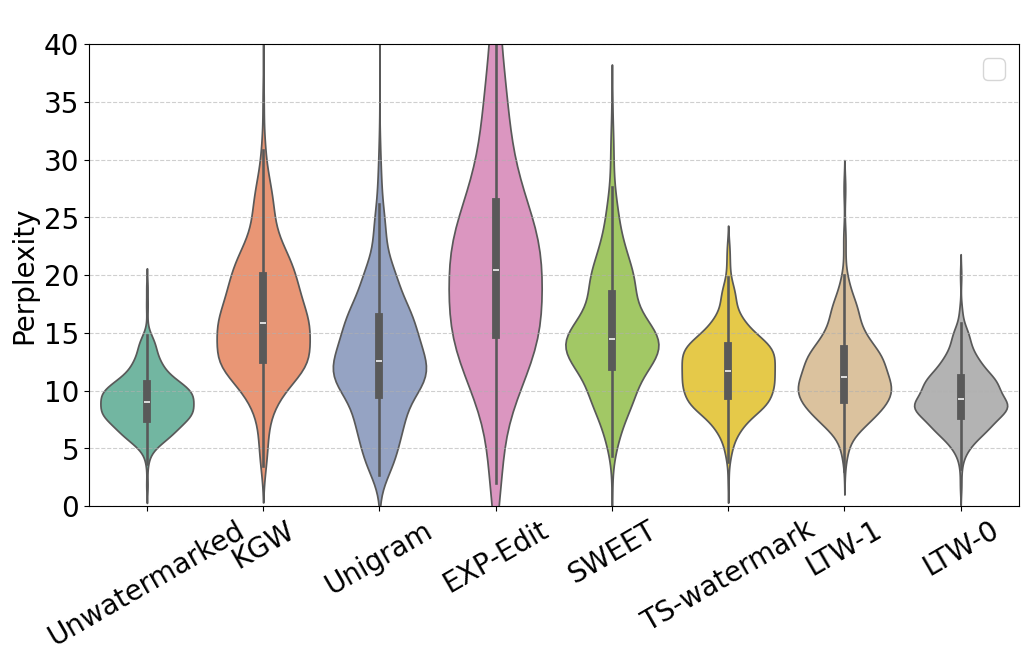

In [2]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 watermarks 是一个字典，包含方法名称和 JSON 文件路径
watermarks = {
    "Unwatermarked": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl_gpt-j.json",
    "KGW": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl_gpt-j.json",
    "Unigram": "/data3/wcr/others work/Unigram-Watermark-main/ppl_gpt-j.json",
    "EXP-Edit": "/data3/wcr/others work/watermark-main/ppl_gpt-j.json",
    "SWEET": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl_gpt-j.json",
    "TS-watermark": "/data3/wcr/others work/TS_watermark-main/ppl_gpt-j.json",
    "Ours_KGW1": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl_gpt-j.json",
    "Ours_KGW0": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl_gpt-j.json",
}

keys = {
    "Unwatermarked": "nowm_ppl",
    "KGW": "kgw_ppl",
    "Unigram": "ppl_list",
    "EXP-Edit": "ppl_list",
    "SWEET": "sweet_ppl",
    "TS-watermark": "ppl_list",
    "Ours_KGW1": "ourwm_1_ppl",
    "Ours_KGW0": "ourwm_ppl",
}

# 读取数据
data = []
for method, path in watermarks.items():
    with open(path, "r") as f:
        json_data = json.load(f)
        ppl_list = json_data[keys[method]]  # 获取对应的key值的列表
        
        # 确保 ppl_list 是列表，否则可能是标量
        if not isinstance(ppl_list, list):
            ppl_list = [ppl_list]
        if method=='Ours_KGW1':
            method="LTW-1"
        elif method=="Ours_KGW0":
            method="LTW-0"
        # 展开列表，每个值对应一行
        for ppl in ppl_list:
            data.append({"Method": method, "Perplexity": ppl})

# 转换为 DataFrame
df = pd.DataFrame(data)

# 绘制小提琴图
plt.figure(figsize=(12, 6))
sns.violinplot(x="Method", y="Perplexity", data=df, palette="Set2")

# 计算无水印方法的均值
# unwatermarked_mean = df[df["Method"] == "Unwatermarked"]["Perplexity"].mean()
# plt.axhline(y=unwatermarked_mean, linestyle="--", color="blue", label="Mean Performance w/o Watermark")

# 其他美化
plt.ylim(0, 40)
plt.legend()
plt.xticks(rotation=30)
plt.title("  ")
plt.xlabel('')
plt.ylabel("Perplexity")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig('/data3/wcr/my_project/selective_watermark_based_on_semantic/eval/ppl_gptj.pdf', bbox_inches='tight')  
plt.show()


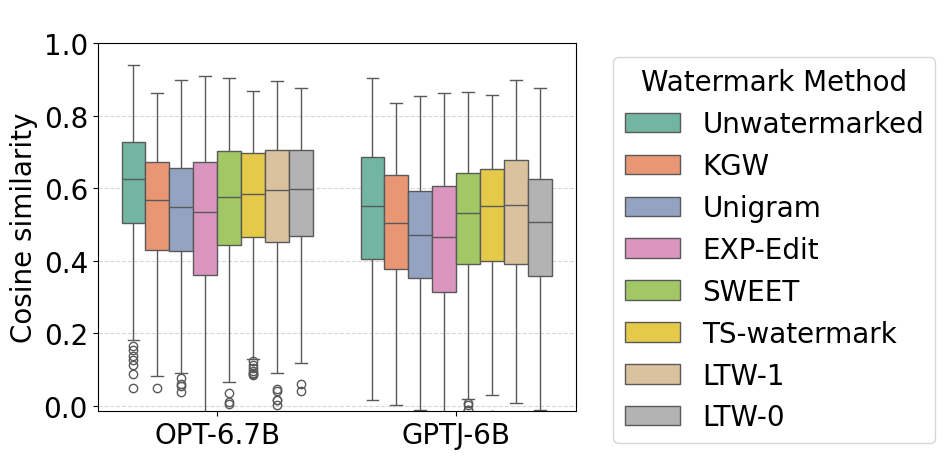

In [3]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size': 20,              # 默认字体大小
    'axes.titlesize': 24,         # 标题字体大小
    'axes.labelsize': 20,         # 轴标签字体大小
    'xtick.labelsize': 20,        # x轴刻度标签字体大小
    'ytick.labelsize': 20,        # y轴刻度标签字体大小
    'legend.fontsize': 20         # 图例字体大小
})
# 方法及其对应的 JSON 路径（为每个模型分别指定）
watermarks = {
    "Unwatermarked": {
        "OPT-6.7B": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl.json",
        "GPTJ-6B": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl_gpt-j.json"
    },
    "KGW": {
        "OPT-6.7B": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl.json",
        "GPTJ-6B": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl_gpt-j.json"
    },
    "Unigram": {
        "OPT-6.7B": "/data3/wcr/others work/Unigram-Watermark-main/cos_sim.json",
        "GPTJ-6B": "/data3/wcr/others work/Unigram-Watermark-main/cos_sim_gptj.json"
    },
    "EXP-Edit": {
        "OPT-6.7B": "/data3/wcr/others work/watermark-main/cos_sim.json",
        "GPTJ-6B": "/data3/wcr/others work/watermark-main/cos_sim_gptj.json"
    },
    "SWEET": {
        "OPT-6.7B": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl.json",
        "GPTJ-6B": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl_gpt-j.json"
    },
    "TS-watermark": {
        "OPT-6.7B": "/data3/wcr/others work/TS_watermark-main/cos_sim.json",
        "GPTJ-6B": "/data3/wcr/others work/TS_watermark-main/cos_sim_gptj.json"
    },
    "Ours_KGW1": {
        "OPT-6.7B": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl.json",
        "GPTJ-6B": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl_gpt-j.json"
    },
    "Ours_KGW0": {
        "OPT-6.7B": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl.json",
        "GPTJ-6B": "/data3/wcr/my_project/selective_watermark_based_on_semantic/eval_records/ppl_gpt-j.json"
    },
}

# JSON文件中的key
keys = {
    "Unwatermarked": "nowm_sim",
    "KGW": "kgw_sim",
    "SWEET": "sweet_sim",
    "Ours_KGW1": "ourwm_1_sim",
    "Ours_KGW0": "ourwm_sim",
}

# 构建数据
data = []
for method, model_paths in watermarks.items():
    if method=='Ours_KGW1':
        method1="LTW-1"
    elif method=="Ours_KGW0":
        method1="LTW-0"
    else:
        method1=method
    for model, path in model_paths.items():
        with open(path, "r") as f:
            json_data = json.load(f)
            if  isinstance(json_data, list):
                sim_list=json_data
            else:
                sim_list = json_data.get(keys[method], [])
            
            for sim in sim_list:
                data.append({"Model": model, "Method": method1, "Sim": sim})

# 转为 DataFrame
df = pd.DataFrame(data)

# 绘制箱线图
plt.figure(figsize=(10, 5))
plt.ylim(-0.015, 1)
sns.boxplot(x="Model", y="Sim", hue="Method", data=df, palette="Set2")

# 图形美化
plt.title(" ")
plt.xlabel('')
plt.ylabel("Cosine similarity")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Watermark Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/data3/wcr/my_project/selective_watermark_based_on_semantic/eval/sim_across_models.pdf')
plt.show()
